Using encoding='ISO-8859-1' ensures that the text in the CSV file is correctly interpreted and read into the DataFrame, especially if the file contains characters specific to Western European languages.

# Load Dataset

In [78]:
import pandas as pd

# Specify the encoding parameter
Data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
Data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [79]:
Data.shape

(5572, 5)

# DATA CLEANING


In [81]:
Data.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]>

In [82]:
# drop last 3 column
Data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [83]:
Data.sample(5)

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5133,ham,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ..."
2645,ham,"Sorry, I'll call later"
3793,ham,Short But Cute: \Be a good person
5339,ham,You'd like that wouldn't you? Jerk!


In [84]:
#rename columns
Data.rename(columns={'v1':'target','v2':'text'},inplace=True)
Data.sample(5)

,target,text
3056,ham,Just woke up. Yeesh its late. But I didn't fal...
833,ham,Thank you so much. When we skyped wit kz and s...
3440,spam,Get a FREE mobile video player FREE movie. To ...
3207,ham,Oops my phone died and I didn't even know. Yea...
2722,ham,It's justbeen overa week since we broke up and...


In [85]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [86]:
Data['target'] = encoder.fit_transform(Data['target'])

In [87]:
Data.sample(5)

,target,text
5146,0,Oh unintentionally not bad timing. Great. Fing...
1437,0,Wat so late still early mah. Or we juz go 4 di...
520,0,But that's on ebay it might be less elsewhere.
416,0,Alright i have a new goal now
1939,1,More people are dogging in your area now. Call...


In [88]:
#missing value
Data.isnull().sum()

target    0
text      0
dtype: int64

In [89]:
#check for duplicate value
Data.duplicated().sum()

403

In [90]:
#remove duplicate
Data=Data.drop_duplicates(keep='first')

In [91]:
Data.duplicated().sum()

0

In [92]:
Data.shape

(5169, 2)

# EDA (Exploratory Data Analysis)

In [93]:
Data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
Data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7e360c3ec910>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

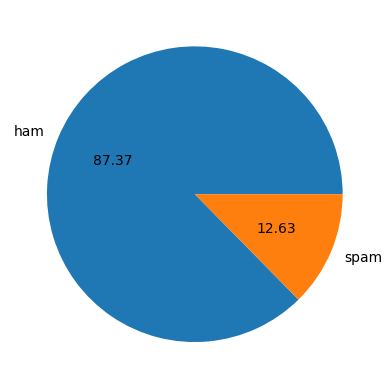

In [95]:
from matplotlib import pyplot as plt
plt.pie(Data['target'].value_counts(),  labels=['ham','spam'],autopct="%.2f")
#data is imbalanced

In [96]:
#Natural language toolkit
import nltk

In [97]:
!pip install nltk

'punkt' is a tokenizer model provided by NLTK. It is used for tokenizing text into sentences and words.

In [98]:
#Dependices
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
#Number of characters
Data['num_characters'] = Data['text'].apply(len)

<ipython-input-99-cc8b2eba551f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['num_characters'] = Data['text'].apply(len)


In [100]:
Data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [101]:
#Number of words
Data['num_words'] = Data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-101-ae6b90ec5b12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['num_words'] = Data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [102]:
Data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [103]:
Data['num_sentences'] = Data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
Data['num_sentences']

<ipython-input-103-95197fd2c590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['num_sentences'] = Data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5169, dtype: int64

In [104]:
Data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [105]:
Data[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [106]:
#For ham messages
Data[Data['target'] == 0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [107]:
#For spam messages
Data[Data['target'] == 1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


 # Data Preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming #similar types words convert into one form example
dancing, dancer , dance

In [108]:
import nltk
from nltk.corpus import stopwords
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    #Removing Non-Alphanumeric Characters

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)


   #Removing Stopwords and Punctuation


    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


   #Stemming
    text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)



In [109]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1 - import nltk: Imports the Natural Language Toolkit library.
2 - from nltk.corpus import stopwords: Imports the stopwords resource from NLTK, which contains a list of common words that are usually removed in text preprocessing.
3 - import string: Imports the string module, which provides constants and functions related to string operations, such as punctuation.

In [110]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Initialize the stemmer
ps = PorterStemmer()

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Remove non-alphanumeric tokens
    text = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]

    # Apply stemming
    text = [ps.stem(i) for i in text]

    # Join the tokens back into a single string
    return " ".join(text)

# Test the function
print(transform_text("HELLO my name 20% are you coming this dancing loving"))

hello name 20 come danc love


In [111]:
transform_text("HELLO my name 20% are you  coming this dancing loving")

'hello name 20 come danc love'

In [112]:
Data['transformed_text'] = Data['text'].apply(transform_text)
Data['transformed_text']

<ipython-input-112-598b02416648>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['transformed_text'] = Data['text'].apply(transform_text)


0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [113]:
Data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Convert text data to numeric

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [115]:
X = tfidf.fit_transform(Data['transformed_text']).toarray()

In [116]:
X.shape #sms, words

(5169, 3000)

In [117]:
y = Data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# Model Building  


1 . Naive Bayes For textual data

MultinomialNB
Type: Discrete features (e.g., word counts)
Distribution: Assumes that the features follow a multinomial distribution.
Use Case: Very effective for text classification tasks, such as email spam detection, where the features are word counts or frequencies.
Recommended: Highly suitable for email spam detection when using CountVectorizer or TfidfVectorizer.

In [120]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [121]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [122]:
y_pred2 = mnb.predict(X_test)

In [123]:
print(accuracy_score(y_pred2, y_test))

0.9709864603481625


2 . Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [125]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [126]:
y_pred4 = DT.predict(X_test)

In [127]:
print(accuracy_score(y_pred4 , y_test))

0.9468085106382979


3 . Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [129]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [130]:
y_pred5 = RF.predict(X_test)

In [131]:
print(accuracy_score(y_pred5 , y_test))

0.9729206963249516
